In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn_pandas import CategoricalImputer
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Check list**

**Rows and columns:** (609,130)

**Variable Type: ** 

**Variable qualitative:**  Organization_1 à  Organization_6
                           headline
                           fullname
                           location_name
                           current_company_position
                           current_company
                           education_1 à education_3

**Variable quantitative:** organization_start_1 à organization_start_6
                           organization_end_1   à organization_end_1

**Analysis of missing values:** we have a lot of missing values:
               we have almost half of the variables >85% NAN



**Data shape analysis**

In [48]:
pd.set_option('display.max_row',130)

In [49]:
!python generate_ProjetDS.py --image_dir=CrowdHumanTrain --csv_input=DataBase.csv --output_path=ch_train.record --label "head"

python3: can't open file 'generate_ProjetDS.py': [Errno 2] No such file or directory


In [50]:
import io
from google.colab import files
data=files.upload()
df=pd.read_csv(io.BytesIO(data['DataBase.csv']),sep=';',error_bad_lines=False,encoding='latin1')

Saving DataBase.csv to DataBase (1).csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:

# url = 'https://github.com/youssefbac/ProjetDS/blob/youssef/DataBase.csv'
# df = pd.read_csv(url,sep = ';',error_bad_lines=False)

#df=pd.read_csv('../DataBase.csv',sep=';',error_bad_lines=False,encoding='latin1')


In [52]:
df.shape


(608, 130)

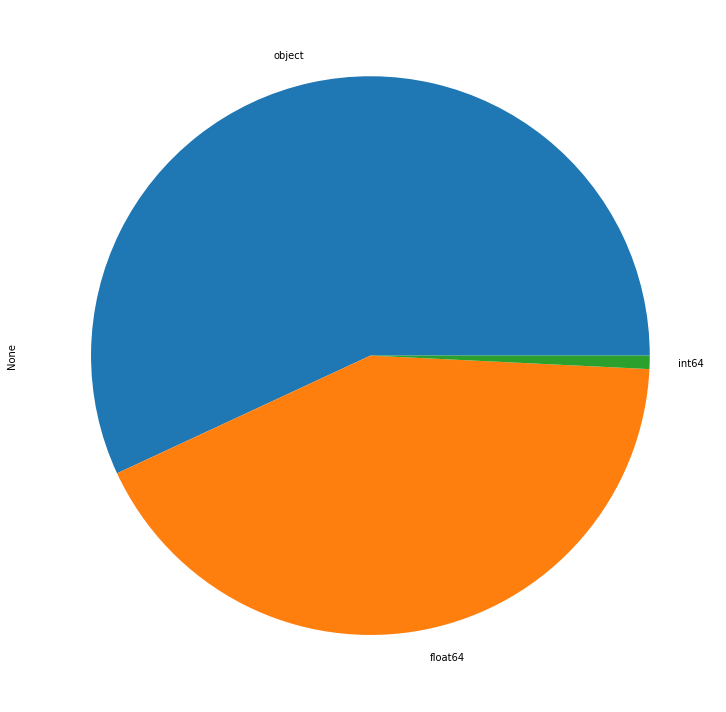

In [53]:
df.dtypes.value_counts().plot.pie()

In [54]:
df.head(5)

,member_id,profile_url,full_name,headline,location_name,summary,address,current_company,current_company_position,organization_1,...,language_proficiency_1,language_2,language_proficiency_2,language_3,language_proficiency_3,languages,skills,tags,note,mutual_count
0,550489359,https://www.linkedin.com/in/baycii/,Baycii Wassim Derbel,Computer Engineer & Data Scientist | Specializ...,"Ville de Paris, Ãle-de-France, France",Computer Engineer & Data Scientist | Specializ...,"Ville de Paris, Ãle-de-France, France",Kaisens Data,Data Scientist Intern,Kaisens Data,...,NaN,NaN,NaN,NaN,NaN,NaN,"Artificial Intelligence (AI) : 2,Web Solutions...",NaN,NaN,19.0
1,698923074,https://www.linkedin.com/in/ichrak-houidi-4560...,Ichrak Houidi,Data scientist intern at Keyrus,"Sousse, Tunisie",There is always more to learn about statistics...,"Sousse, Tunisie",Keyrus,Data scientist,Keyrus,...,NaN,NaN,NaN,NaN,NaN,NaN,"Python (langage de programmation) : 2,Deep lea...",NaN,NaN,13.0
2,595214386,https://www.linkedin.com/in/oussama-sassi-92a4...,Oussama Sassi,Data Scientist chez RUTILEA,"Ariana, Tunisie",Je suis Oussama Sassi actuellement Ã©tudiant e...,"Ariana, Tunisie","Rutilea, Inc.",Data Scientist,"Rutilea, Inc.",...,NaN,NaN,NaN,NaN,NaN,NaN,"R : null,MySQL : null,Java : null,NoSQL : null...",NaN,NaN,9.0
3,766616182,https://www.linkedin.com/in/skander-haddad-75a...,Skander Haddad,Data Scientist | Deeplearning.ai ambassador | ...,"Monastir, Tunisie",NaN,"Monastir, Tunisie",Enactus Esprit ICT,Alumni,Enactus Esprit ICT,...,Bilingue ou langue natale,English,CapacitÃ© professionnelle complÃ¨te,French,CapacitÃ© professionnelle complÃ¨te,"Arabic,English,French","JavaScript : 1,HTML : 1,Python : 1,MySQL : 1,J...",NaN,NaN,6.0
4,621761804,https://www.linkedin.com/in/kais-ben-youssef-a...,Kais Youssef,Data Scientist chez ENGIE,"Paris, Ãle-de-France, France",NaN,"Paris, Ãle-de-France, France",ENGIE,Data Scientist,ENGIE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


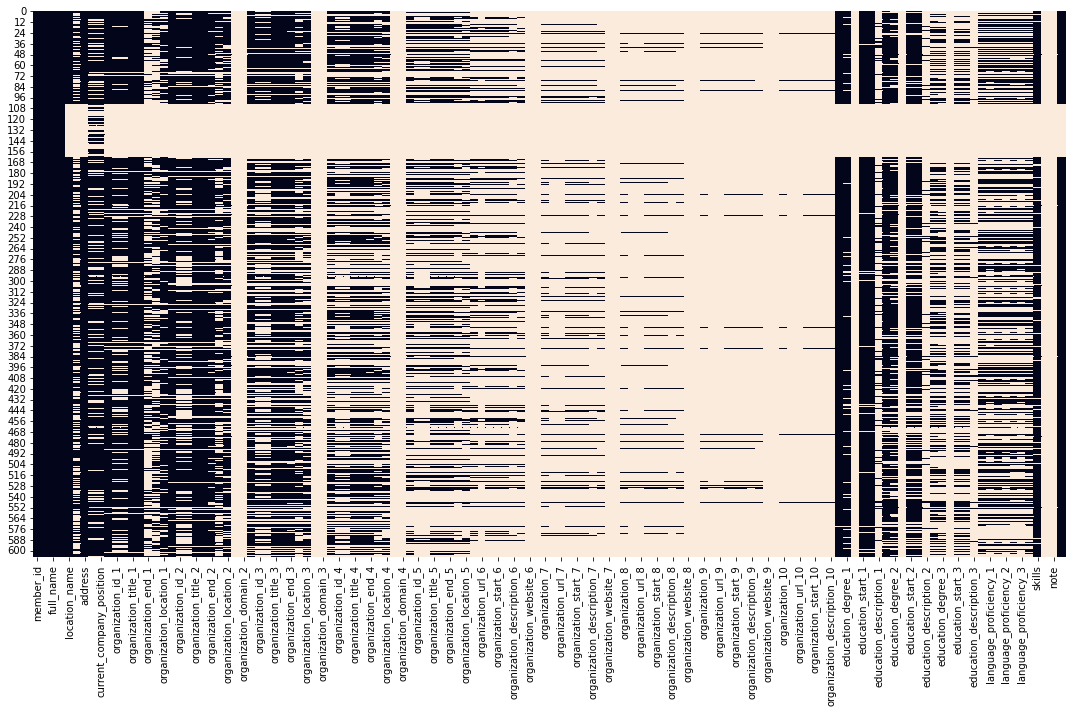

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False)

In [56]:
(df.isna().sum()/df.shape[0]).sort_values()

member_id                      0.000000
profile_url                    0.000000
full_name                      0.000000
headline                       0.000000
address                        0.097039
mutual_count                   0.097039
location_name                  0.097039
education_1                    0.098684
education_start_1              0.123355
education_end_1                0.123355
organization_1                 0.125000
organization_title_1           0.125000
organization_start_1           0.125000
skills                         0.154605
education_degree_1             0.162829
organization_2                 0.179276
organization_start_2           0.179276
organization_title_2           0.179276
organization_end_2             0.226974
education_2                    0.228618
current_company                0.238487
current_company_position       0.238487
education_start_2              0.286184
education_end_2                0.286184
organization_location_1        0.291118


We observe that:
member_id,profile_url,full_name,headline columns have no missing values


**Fund Analysis**



 **Elimination of unnecessary columns**

In [57]:
#prendre les columnes dont les valeurs manquantes moins de 85% 
df=df[df.columns[df.isna().sum()/df.shape[0] <0.85]]

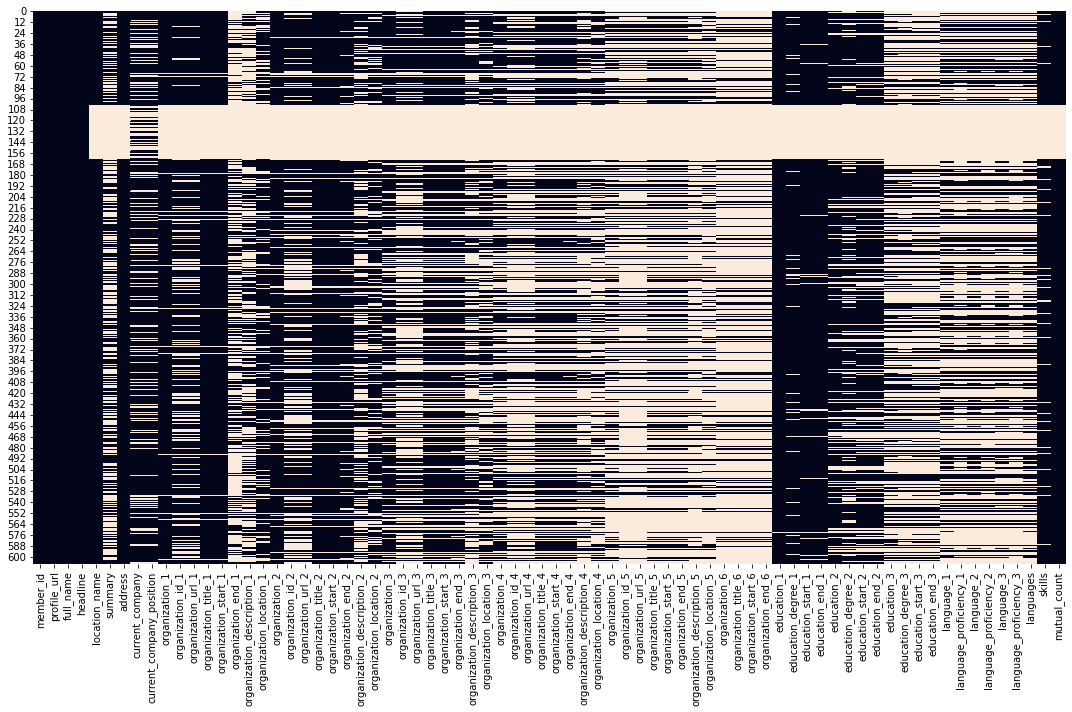

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False)

In [59]:
df.shape

(608, 74)

In [60]:
df.columns

Index(['member_id', 'profile_url', 'full_name', 'headline', 'location_name',
       'summary', 'address', 'current_company', 'current_company_position',
       'organization_1', 'organization_id_1', 'organization_url_1',
       'organization_title_1', 'organization_start_1', 'organization_end_1',
       'organization_description_1', 'organization_location_1',
       'organization_2', 'organization_id_2', 'organization_url_2',
       'organization_title_2', 'organization_start_2', 'organization_end_2',
       'organization_description_2', 'organization_location_2',
       'organization_3', 'organization_id_3', 'organization_url_3',
       'organization_title_3', 'organization_start_3', 'organization_end_3',
       'organization_description_3', 'organization_location_3',
       'organization_4', 'organization_id_4', 'organization_url_4',
       'organization_title_4', 'organization_start_4', 'organization_end_4',
       'organization_description_4', 'organization_location_4',
       'org

In [61]:
df=df.drop(['organization_id_1','organization_id_2','organization_id_3','organization_id_4','organization_id_5'],axis=1)

In [62]:

df=df.drop(['language_1','language_proficiency_1','language_2','language_proficiency_2','language_3','language_proficiency_3','languages'],axis=1)

In [63]:

df =df.drop(['education_start_1','education_start_2','education_start_3'],axis=1)

In [64]:
df =df.drop(['education_end_1','education_end_2','education_end_3'],axis=1)

In [65]:
df =df.drop(['summary','mutual_count'],axis=1)

In [66]:
#df =df.drop(df.index[102:162],inplace=True)

# index_with_nan = df.index[df.isnull().any(axis=1)]
# df.drop(index_with_nan,0, inplace=True)

In [67]:
df.shape


(608, 54)

**Histogrammes des variables continues**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

<Figure size 1440x720 with 0 Axes>

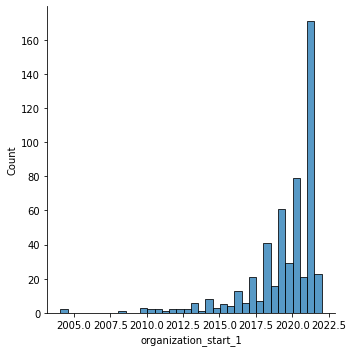

<Figure size 1440x720 with 0 Axes>

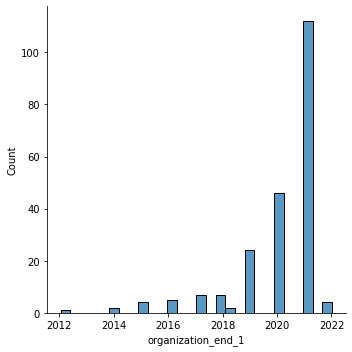

<Figure size 1440x720 with 0 Axes>

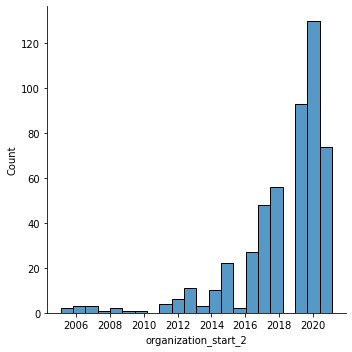

<Figure size 1440x720 with 0 Axes>

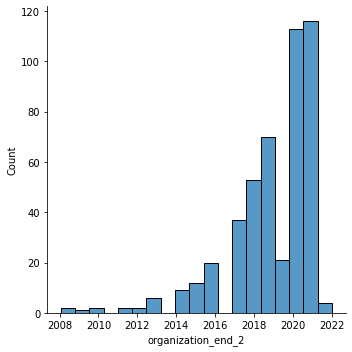

<Figure size 1440x720 with 0 Axes>

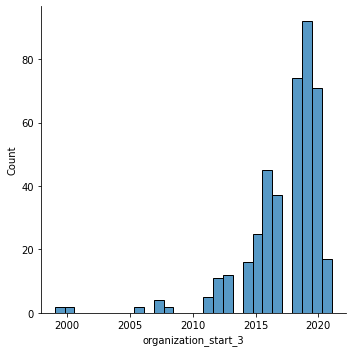

<Figure size 1440x720 with 0 Axes>

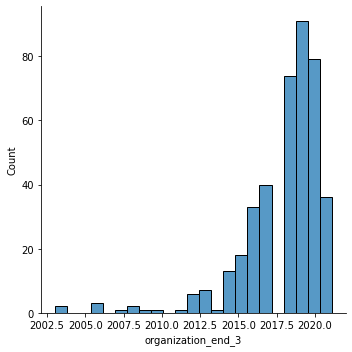

<Figure size 1440x720 with 0 Axes>

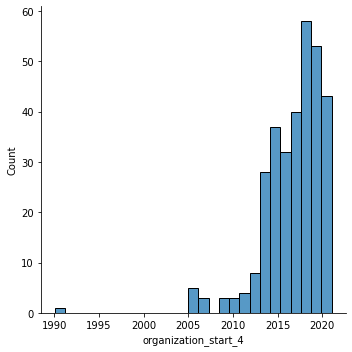

<Figure size 1440x720 with 0 Axes>

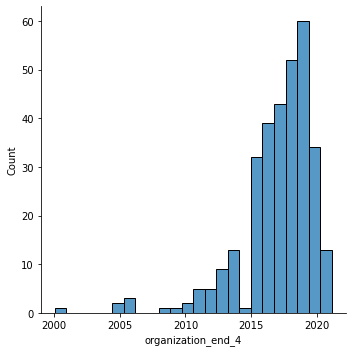

<Figure size 1440x720 with 0 Axes>

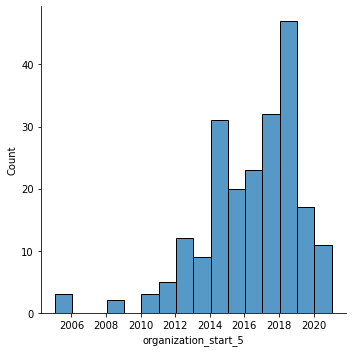

<Figure size 1440x720 with 0 Axes>

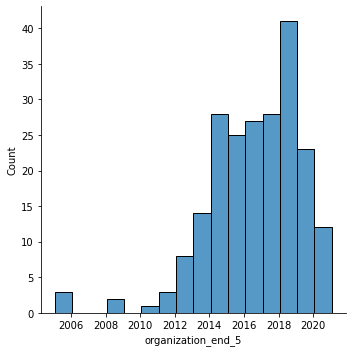

<Figure size 1440x720 with 0 Axes>

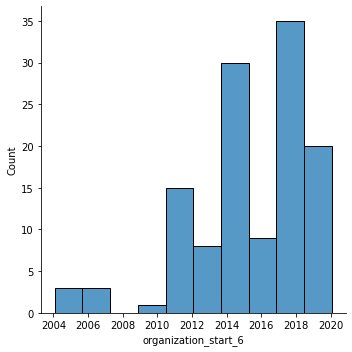

<Figure size 1440x720 with 0 Axes>

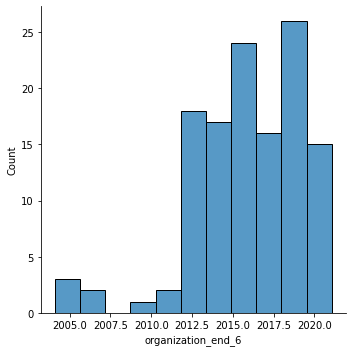

In [68]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.displot(df[col])


**Varaibles Quanlitatives**

**Organisation**

In [69]:
orgs = ['organization_1','organization_2','organization_3','organization_4','organization_5','organization_6']
final_count = Counter()
for org in orgs:
  final_count = final_count + Counter(df.groupby([org]).size().to_dict())
print(final_count)

Counter({'Tunisie TÃ©lÃ©com': 51, 'Sagemcom': 34, "SociÃ©tÃ© Tunisienne de l'ElectricitÃ© et du Gaz (STEG)": 28, 'Sofrecom Tunisie': 28, "Ecole Nationale d'IngÃ©nieurs de Tunis": 26, "ENSI - Ecole Nationale des Sciences de l'Informatique": 17, 'ACTIA Engineering Services': 14, "ESPRIT (Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de Technologies)": 14, 'Valeo': 14, 'WEVIOO': 13, 'BIAT': 12, 'SONEDE': 12, 'ODDO BHF': 11, 'Telnet': 11, "Ecole Nationale d'Ingenieurs de Tunis": 10, 'TUNICAST FOUNDRY': 10, "Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de Technologies - ESPRIT": 9, 'Safran': 9, 'VERMEG for Banking & Insurance Software': 9, 'axefinance': 9, 'Cognira': 8, 'Ooredoo Tunisie': 8, 'Orange Tunisie': 8, 'SAGEMCOM': 8, 'SERS INGENIERIE': 8, 'Talan Tunisie': 8, 'Mitakus analytics': 8, 'ONAS': 8, 'ESPRIT': 8, '3S Standard Sharing Software': 7, 'EPAC Technologies': 7, 'ESI Group': 7, 'IT SERV': 7, 'STUDI International': 7, 'ENIT Junior Entreprise': 7, 'Altran': 6, 'ENSI Junior Entreprise': 

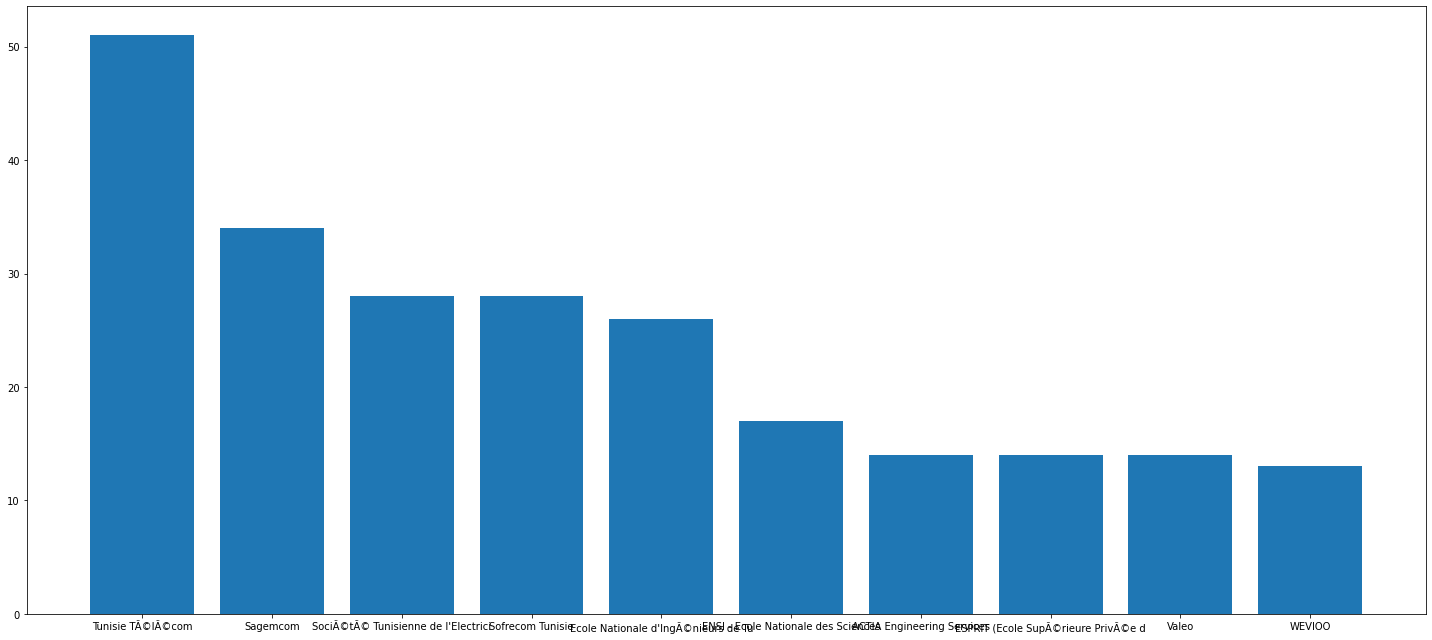

In [70]:
dictc = {}
plt.rcParams["figure.figsize"] = [20, 9]
plt.rcParams["figure.autolayout"] = True

for element , count in final_count.most_common(10):
  dictc[element[0:35]] = count
plt.bar(dictc.keys(), dictc.values())
plt.show()


**Organisation Location**

In [144]:
Location=df[['organization_location_1','organization_location_2','organization_location_3','organization_location_4','organization_location_5']]


In [71]:
orgs = ['organization_location_1','organization_location_2','organization_location_3','organization_location_4','organization_location_5']

final_count = Counter()
for org in orgs:
  final_count = final_count + Counter(df.groupby([org]).size().to_dict())
print(final_count)

Counter({'Tunisie': 325, 'Tunis, Tunisie': 205, 'Gouvernorat deÂ\xa0Tunis, Tunisia': 141, 'Tunisia': 44, 'Gouvernorat deÂ\xa0lâ\x80\x99Ariana, Tunisia': 36, 'Tunis': 32, 'Tunis, Tunisia': 31, 'Ariana, Tunisie': 28, 'Sousse, Tunisie': 28, 'Ben Arous, Tunisie': 19, 'RÃ©gion de Paris, France': 19, 'Gouvernorat de la Manouba, Tunisia': 18, 'Gouvernorat deÂ\xa0Ben Arous, Tunisia': 18, 'Gouvernorat deÂ\xa0Monastir, Tunisia': 17, 'Gouvernorat deÂ\xa0Sousse, Tunisia': 14, 'Megrine, Ben Arous, Tunisie': 14, 'Ville de Paris, Ã\x8ele-de-France, France': 14, 'Gouvernorat deÂ\xa0Sfax, Tunisia': 13, 'Tunis Governorate, Tunisia': 12, 'Manouba, Tunisie': 11, 'Monastir, Tunisie': 11, 'tunis': 10, 'Gouvernorat deÂ\xa0GabÃ¨s, Tunisia': 7, 'Sfax, Tunisie': 7, 'Gouvernorat deÂ\xa0Kairouan, Tunisia': 6, 'Paris, Ã\x8ele-de-France, France': 6, 'Gouvernorat deÂ\xa0Bizerte, Tunisia': 6, 'Nabeul, Tunisie': 6, 'Sousse': 6, 'Ariana Governorate, Tunisia': 5, 'BÃ©ja, Tunisie': 5, 'Aix-en-Provence, Provence-Alpes-CÃ´

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


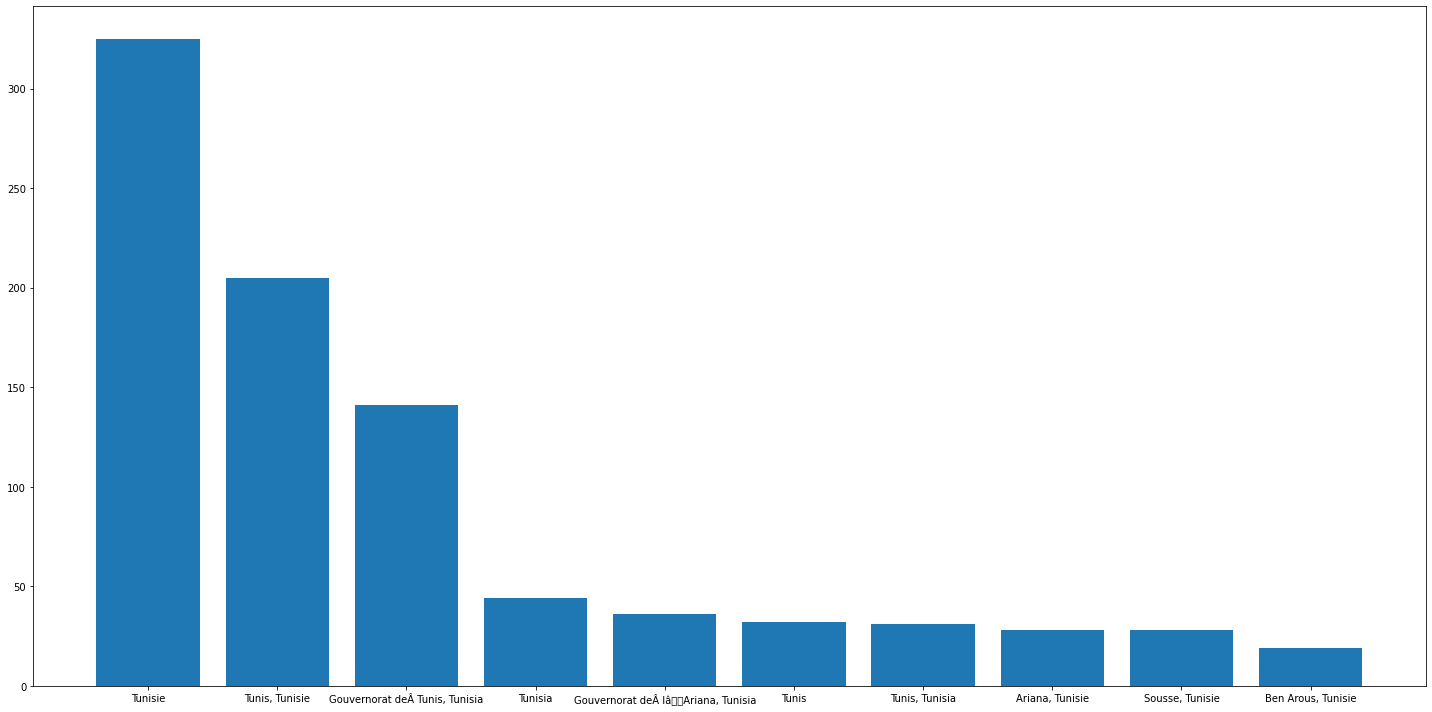

In [72]:
dictc = {}
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

for element , count in final_count.most_common(10):
  dictc[element[0:35]] = count
plt.bar(dictc.keys(), dictc.values())
plt.show()

**Education**

In [152]:
orgs = ['education_1','education_2','education_3']
modif = (df.education_1 == "Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de Technologies - ESPRIT")|(df.education_1 =='Ecole Sup PrivÃ©e dâ\x80\x99IngÃ©nierie et des Technologies (ESPRIT)_TUNISIE')| (df.education_1  =='ESB : Esprit School of Business')
df.loc[modif,'education_1'] = "ESPRIT"
modif = (df.education_1  == "Ecole nationale superieur d'ingenieurs de tunis")|(df.education_1 =="Ecole Nationale d'IngÃ©nieurs de Tunis")| (df.education_1 ==  'ENIT') | (df.education_1 =="Ecole Nationale d'IngÃ©nieur de Tunis ENIT")|(df.education_1  =="Ecole Nationale d'ingÃ©nieurs de Tunis")|(df.education_1  =="Ecole nationale d'ingenieur de tunis")|(df.education_1  == 'Ecole Nationale des IngÃ©nieurs de TUNIS')|(df.education_1  == "Ecole national d'ingÃ©nieurs de tunis ENIT")|(df.education_1  == "Ecole Nationale d'IngÃ©nieur de Tunis ENIT")|(df.education_1  =="Ecole National d'IngÃ©nieurs de Tunis")|(df.education_1  == 'Ecole Nationale  dâ\x80\x99 IngÃ©nieurs de Tunis  ENIT')|(df.education_1  == 'Ecole Nationale dâ\x80\x99IngÃ©nieurs de Tunis')|(df.education_1  == 'Ecole national superieur dâ\x80\x99ingenieurs de Tunis') |(df.education_1  == "Ecole National d'IngÃ©nieurs de Tunis ENIT")|(df.education_1  =='Ecole Nationale dâ\x80\x99IngÃ©nieurs de Tunis (ENIT)')|(df.education_1 =='Ecole nationale dâ\x80\x99ingÃ©nieur de Tunis')|(df.education_1  =="Ecole Nationale d'IngÃ©nieurs de Tunis (ENIT)")|(df.education_1  =='Ecole nationale des ingÃ©nieurs de Tunis')|(df.education_1  =='Ecole Nationale des IngÃ©nieurs de Tunis - Tunisie')|(df.education_1  =="Ecole Nationale d' IngÃ©nieurs de Tunis  (ENIT)")|(df.education_1  =='Ecole national des IngÃ©nieurs de Tunis')|(df.education_1  =="Ecole nationale d'ingÃ©nieurs de Tunis")|(df.education_1  =="Ecole Doctorale Sciences et Techniques de l'IngÃ©nieur de l'ENIT")|(df.education_1  =='enit')|(df.education_1 ==  'IPEIT Mont-fleury/ENIT GÃ©nie Insustriel')|(df.education_1 =='Ecole National des IngÃ©nieurs de Tunis')
df.loc[modif, 'education_1'] = "ENIT"
modif = (df.education_1  =="ENSI - Ecole Nationale des Sciences de l'Informatique")|(df.education_1== "Ã\x89cole Nationale des Sciences de l'Informatique")|(df.education_1  =="Ecole Nationale des Sciences de l'Informatique")|(df.education_1  == "ecole nationale des sciences de l'informatique")|(df.education_1 =="Ecole national des sciences et d'ingÃ©nieurs de tunis")|(df.education_1  == "Ã©cole nationale des sciences de l'informatique (ENSI)")|(df.education_1  == "Ecole national des sciences et d'ingÃ©nieurs de tunis")|(df.education_1  =="Ecole nationale des sciences de l'informatique")|(df.education_1 ==  "Ã\x89cole nationale supÃ©rieure d'ingÃ©nieur Ã\xa0 Tunis")|(df.education_1 =="ENSIIE - Ã\x89cole Nationale SupÃ©rieure d'Informatique pour l'Industrie et l'Entreprise")
df.loc[modif, 'education_1'] = "ENSI"
modif = (df.education_1  ==  "SUP'COM")|(df.education_1  =="Sup'Com")
df.loc[modif, 'education_1'] = "Sup Com"
modif = (df.education_1 ==  "Le Mans UniversitÃ©")|(df.education_1  =="ENSIM Ecole d'ingÃ©nieurs Le Mans UniversitÃ©")|(df.education_1  =='UniversitÃ© Gustave Eiffel')|(df.education_1  =='UniversitÃ© Paris Dauphine- PSL')|(df.education_1  == 'UniversitÃ© Sorbonne Paris Nord')|(df.education_1  =="3iL - Ecole d'ingÃ©nieur en informatique - Limoges")|(df.education_1  =="Institut de Statistique de l'UniversitÃ© de Paris - ISUP")|(df.education_1 =='UniversitÃ© Claude Bernard Lyon 1') |(df.education_1 =='ENSEEIHT')|(df.education_1  =='Institut du Risque et de lâ\x80\x99Assurance du Mans')|(df.education_1 =='UniversitÃ© de Technologie de Troyes')|(df.education_1  =="CESI Ecole d'IngÃ©nieurs") |(df.education_1  =='Hochschule Schmalkalden')
df.loc[modif, 'education_1'] = "Ecole ingenieur France"   
modif = (df.education_1  ==  "Ecole Nationale d'IngÃ©nieurs de GabÃ¨s (E.N.I.G)")|(df.education_1  =="Nationale d'ingÃ©nieurs de GabÃ¨s")|(df.education_1  ==  'Institut SupÃ©rieure de Sciences AppliquÃ©es et de Technologie de Gabes (ISSATG)')      
df.loc[modif, 'education_1'] ="E.N.I.G"
modif = (df.education_1  =="Institut PrÃ©paratoire aux Etudes d'IngÃ©nieurs de Bizerte - IPEIB")|(df.education_1  == "IPEIT - Institut PrÃ©paratoire aux Etudes d'IngÃ©nieurs de Tunis")|(df.education_1  == "Institut PrÃ©paratoire aux Etudes d'IngÃ©nieurs El Manar (IPEIEM)")|(df.education_1  == "Institut PrÃ©paratoire Aux Etudes d'IngÃ©nieurs d'El Manar")|(df.education_1 == 'UniversitÃ© de Tunis El Manar')|(df.education_1 == 'IPEI EL MANAR')    
df.loc[modif, 'education_1'] ="PREPA"          
modif = (df.education_1  ==   'SMU - South Mediterranean University (MSB- MedTech-LCI)' )|(df.education_1 =='CentraleSupÃ©lec')|(df.education_1 == 'Ecole SupÃ©rieure de la Statistique et de lâ\x80\x99Analyse de lâ\x80\x99Information')|(df.education_1  == "Reiki Tunisie")|(df.education_1  == "Institut des Hautes Etudes Commerciales de Carthage")|(df.education_1  == 'UniversitÃ© de Technologie de CompiÃ¨gne (UTC)')|(df.education_1 == 'SMU - South Mediterranean University (MSB- MedTech-LCI)') |(df.education_1 == 'ESIM (ESIER)' 'Reiki Tunisie')|(df.education_1 ==    "Ã\x89cole Nationale d'ingÃ©nieurs de Sousse")|(df.education_1 == "Ecole SupÃ©rieure de Technologie et d'Informatique (E.S.T.I.)")|(df.education_1 == 'institut supÃ©rieur des Ã©tude technologique de rades') |(df.education_1 =='Institut Superieur des Etudes Technologiques de Rades')|(df.education_1 =='Actinuum') |(df.education_1 == 'UniversitÃ© Libre de Tunis (ULT)' ) |(df.education_1 == 'Go My Code')|(df.education_1 ==  'Ecole SupÃ©rieure de Communications de Tunis')|(df.education_1 ==  'UniversitÃ© arabe des Sciences') |(df.education_1 ==   'LinSoft')|(df.education_1 ==  'Institut SupÃ©rieur des Sciences AppliquÃ©es et de Technologie de Kairouan â\x80\x93 ISSATK')|(df.education_1 ==  'International Training School (ITS)')|(df.education_1 ==   'universite de douala') |(df.education_1 ==  "ISEN - Page Ã©cole - Ã\x89cole d'ingÃ©nieurs des Hautes Technologies et du NumÃ©rique")|(df.education_1 ==  'CY Tech')|(df.education_1 ==  "Ã\x89cole SupÃ©rieure de la Statistique et de l'Analyse de l'Information")|(df.education_1 ==  "ISEP - Ã©cole d'ingÃ©nieurs du numÃ©rique")|(df.education_1 == 'Ã\x89cole Polytechnique')|(df.education_1 =='Faculte des sciences de Monastir')|(df.education_1 =='FST')  |(df.education_1 == "Ã\x89cole Nationale d'Electronique et des TÃ©lÃ©communications de Sfax (ENET'Com)")|(df.education_1 =='INSAT - Institut National des Sciences AppliquÃ©es et de Technologie')
df.loc[modif, 'education_1'] = "Autre"

df['education_1'].unique()
       

array(['Ecole ingenieur France', 'ESPRIT', 'Autre', 'ENIT', 'ENSI',
       'Sup Com', 'E.N.I.G', 'PREPA'], dtype=object)

In [149]:
orgs = ['education_1','education_2','education_3']

final_count = Counter()
for org in orgs:
  final_count = final_count + Counter(df.groupby([org]).size().to_dict())
print(final_count)

Counter({'Unknown': 367, 'ENIT': 349, "Ecole Nationale d'IngÃ©nieurs de Tunis": 196, 'ENSI': 82, 'ESPRIT': 71, "IPEIT - Institut PrÃ©paratoire aux Etudes d'IngÃ©nieurs de Tunis": 44, "Institut prÃ©paratoire aux Ã©tudes d'ingÃ©nieurs d'El Manar (IPEIEM)": 44, 'Autre': 42, "IPEIN - Institut PrÃ©paratoire aux Ã\x89tudes d'IngÃ©nieur de Nabeul": 37, 'Sup Com': 31, "Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de Technologies - ESPRIT": 31, 'Ecole ingenieur France': 25, "IPEIS - Institut PrÃ©paratoire aux Ã\x89tudes d'IngÃ©nieur de Sfax": 25, 'FacultÃ© des Sciences MathÃ©matiques, Physiques et Naturelles de Tunis': 11, 'PREPA': 8, "Institut PrÃ©paratoire aux Etudes d'IngÃ©nieurs de Monastir": 8, "ENSI - Ecole Nationale des Sciences de l'Informatique": 7, 'Ecole Nationale dâ\x80\x99IngÃ©nieurs de Carthage ENICarthage': 7, 'Institut SupÃ©rieur des Etudes Technologiques en Communications de Tunis': 7, 'IPEIB': 6, 'Preparatory Institute for Engineering Studies of Monastir (IPEIM)': 6, 'E.N.I.G': 

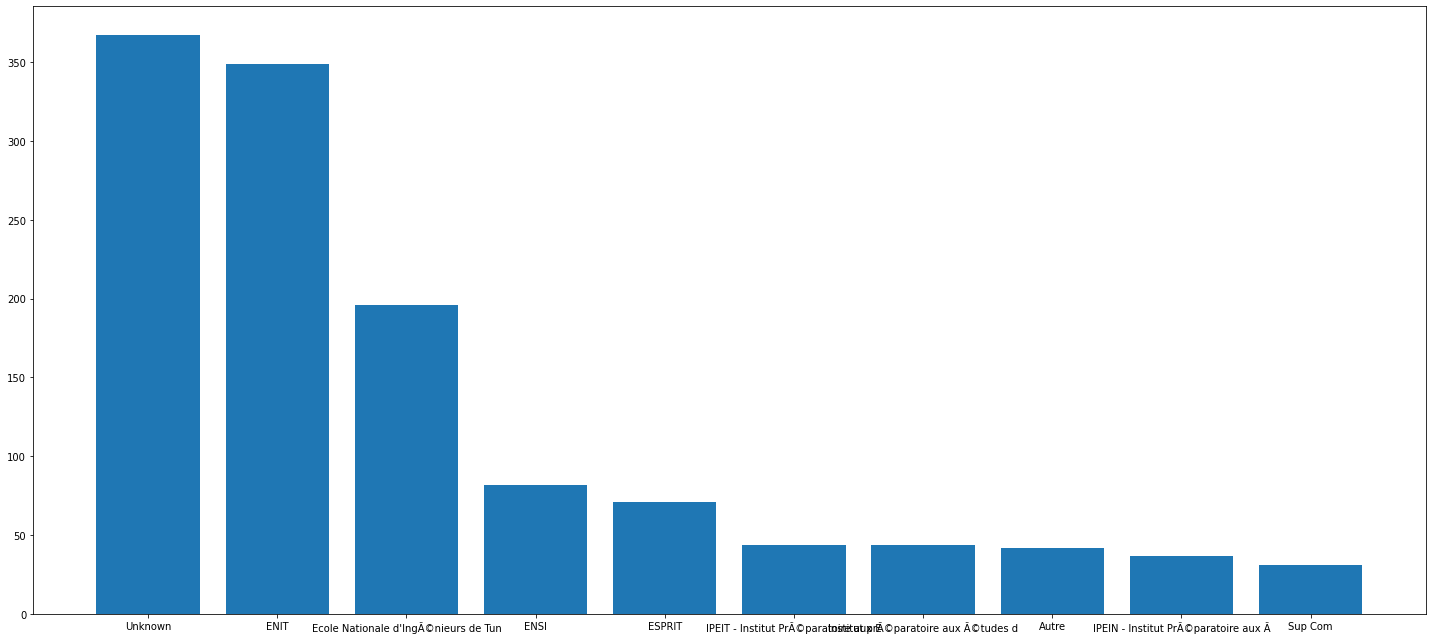

In [150]:
dictc = {}
plt.rcParams["figure.figsize"] = [20, 9]
plt.rcParams["figure.autolayout"] = True

for element , count in final_count.most_common(10):
  dictc[element[0:36]] = count
plt.bar(dictc.keys(), dictc.values())
plt.show()

**Current Company Position**




In [131]:
modif = (df.current_company_position == "Data Scientist Intern")|(df.current_company_position =='Data scientist/Data engineer')| (df.current_company_position ==  'Data Engineer Intern')|(df.current_company_position == "Data Scientist - Data analyst") |(df.current_company_position == "Data scientist | MEAN stack developer engineer")| (df.current_company_position == "Data scientist")| (df.current_company_position == "End of studies internship")| (df.current_company_position == "End of studies Internship")| (df.current_company_position == "Consultant data scientist") | (df.current_company_position == "Junior Data Scientist")| (df.current_company_position == "T24 technical consultant")| (df.current_company_position =='AI Engineer') | (df.current_company_position =='Data Science Intern')| (df.current_company_position =='Data Scientist - NLP')|(df.current_company_position =='IngÃ©nieur statisticien')|(df.current_company_position =='Scientist')|(df.current_company_position =='Stagiaire data scientist')| (df.current_company_position == "Data scientist / Data engineer")| (df.current_company_position == "Data Science Engineer")|(df.current_company_position == "Data Scientist - Data Engineer") |  (df.current_company_position == "AI Trainee Researcher") | (df.current_company_position == "Data Scientist engineer") | (df.current_company_position == "Junior Data Scientist")| (df.current_company_position == "T24 technical consultant")| (df.current_company_position =='AI Engineer') | (df.current_company_position =='Data Science Intern')| (df.current_company_position =='Data Scientist - NLP')|(df.current_company_position =='IngÃ©nieur statisticien')|(df.current_company_position =='Scientist')|(df.current_company_position =='Stagiaire data scientist')| (df.current_company_position == 'Data Scientist / Data enginner')| (df.current_company_position == "Data Science Engineer")|(df.current_company_position == "AI Trainee Researcher") | (df.current_company_position == "Data Scientist engineer")| (df.current_company_position == "Data Instructor")| (df.current_company_position == "Machine Learning Engineer")| (df.current_company_position == "Data Enginner")| (df.current_company_position == "AI Engineer")| (df.current_company_position == "Alumni")| (df.current_company_position == "IngÃ©nieur en dÃ©veloppement logiciel - Python") | (df.current_company_position == "data analyst | data scientist | Devops")|(df.current_company_position == "Data Scientist") | (df.current_company_position == "scientist")| (df.current_company_position == "Data Scientist - PÃ´le donnÃ©es & innovation, DGEX Solutions") | (df.current_company_position == "Data Scientist et dÃ©veloppeur BI")| (df.current_company_position == "Data scientist engineer")| (df.current_company_position == "ML/DataOps & AI-Engineer")| (df.current_company_position == "Consultante en Data Science")| (df.current_company_position == "Graduation Project Internship")| (df.current_company_position =='Enseignant formateur')
df.loc[modif, 'current_company_position'] = "Data Science"
modif = (df.current_company_position == 'Embedded Software Engineer')| (df.current_company_position ==  'IngÃ©nieur DÃ©veloppement EmbarquÃ©') | (df.current_company_position == 'systèmes embarqués') | (df.current_company_position == 'Embedded software engineering intern')| (df.current_company_position == 'IngÃ©nieur logiciels embarquÃ©s')
df.loc[modif, 'current_company_position'] = 'SLEAM'
modif = (df.current_company_position== 'mechanical engineering student')| (df.current_company_position =='IngÃ©nieur dÃ©veloppement mÃ©canique') | (df.current_company_position == 'Électromécanique') | (df.current_company_position == 'Stage en ingÃ©nierie ') | (df.current_company_position == 'Electromécanique')| (df.current_company_position == 'mechanical engineering student') | (df.current_company_position == 'IngÃ©nieur conception mÃ©canique') | (df.current_company_position == 'mécatronique') | (df.current_company_position == 'Mécatronique') | (df.current_company_position == 'IngÃ©nieur Application MÃ©canique') | (df.current_company_position == 'mécatronique ') | (df.current_company_position == 'mécanique ') | (df.current_company_position == 'Mechanical Engineer') | (df.current_company_position == 'IngÃ©nieur en gÃ©nie Ã©lectrique spÃ©cialisÃ©') | (df.current_company_position == 'IngÃ©nieur Ã©lectricitÃ©, recherche/dÃ©veloppement,maintenance')
df.loc[modif, 'current_company_position'] = 'Électromécanique'
modif = (df.current_company_position== 'IngÃ©nieur dÃ©veloppement')  | (df.current_company_position ==  'Backend Engineer') | (df.current_company_position ==  'IngÃ©nieur dâ\x80\x99Ã©tude et dÃ©veloppement')| (df.current_company_position == 'IngÃ©nieur dÃ©veloppement junior')| (df.current_company_position == 'Devops Engineer') | (df.current_company_position == 'Software Development Engineer')| (df.current_company_position == 'Full Stack Engineer')| (df.current_company_position == 'DevOps Engineer')| (df.current_company_position == 'Ingenieur Developpement API&WS') | (df.current_company_position == 'IngÃ©nieur Full Stack .Net/Angular')| (df.current_company_position == 'DÃ©veloppeur Full Stack') | (df.current_company_position== 'IngÃ©nieur dÃ©veloppement C/C++')| (df.current_company_position == 'IngÃ©nieur en DÃ©veloppement Java/JEE') | (df.current_company_position == 'IngÃ©nieur de dÃ©veloppement .Net ') | (df.current_company_position == 'IngÃ©nieur full stack') | (df.current_company_position == 'IngÃ©nieur DevOps') | (df.current_company_position == 'Software Engineer')  | (df.current_company_position == ' Backend Engineer')| (df.current_company_position == 'devops engineer')| (df.current_company_position == 'ingã©nieur dã©veloppement')|(df.current_company_position == 'Enseignante vacataire :  Spring  et  Architecture OrientÃ© Service (SOA) en java')| (df.current_company_position =='IngÃ©nieur dÃ©veloppeur .Net') | (df.current_company_position == 'IngÃ©nieur JAVA/JEE')| (df.current_company_position ==   'DÃ©veloppeur JAVA/JEE')| (df.current_company_position ==  'IngÃ©nieur JAVA EE')| (df.current_company_position ==  'Projet de fin dâ\x80\x99Ã©tudes')| (df.current_company_position ==  'Softwar engineer intern')
df.loc[modif, 'current_company_position'] = 'Devops'
modif = (df.current_company_position == "Data Analyst | Data scientist | DevOps") | (df.current_company_position == "Business-analyst") | (df.current_company_position == "Business intelligence Consultant and Data scientist") | (df.current_company_position == "ERP-BI") | (df.current_company_position == 'ERP-Bi ') | (df.current_company_position == 'Data Engineer') | (df.current_company_position == 'Business Analyst') |(df.current_company_position=="Etudiant en MastÃ¨re spÃ©cialisÃ© ERP Management et ingÃ©nieur")                      
df.loc[modif, "current_company_position"] ="ERP-BI"
modif = (df.current_company_position == 'ingã©nieur en gã©nie civil')|(df.current_company_position =='IngÃ©nieur gÃ©nie civil')|(df.current_company_position == 'IngÃ©nieur en gÃ©nie civil responsable planification et production') | (df.current_company_position == 'IngÃ©nieur dâ\x80\x99Ã©tudes gÃ©nie civil')| (df.current_company_position == 'IngÃ©nieur Structure GÃ©nie civil') | (df.current_company_position == 'IngÃ©nieur Structure GÃ©nie Civil') | (df.current_company_position == 'IngÃ©nieur principal en gÃ©nie civil')|(df.current_company_position == 'IngÃ©nieur civil')|(df.current_company_position == 'ingã©nieur gã©nie civil')|(df.current_company_position == 'IngÃ©nieur GÃ©nie civil')|(df.current_company_position == 'IngÃ©nieur en gÃ©nie civil')|(df.current_company_position == 'IngÃ©nieur GÃ©nie Civil')|(df.current_company_position == 'Civil project Manager ')|(df.current_company_position == "IngÃ©nieur en GÃ©nie Logiciel de l'INSAT. Ã\x89tudiant")|(df.current_company_position ==  'IngÃ©nieur structure gÃ©nie civil') |(df.current_company_position == 'Etudiante')
df.loc[modif, 'current_company_position'] = 'Génie Civil'
modif = (df.current_company_position == 'ã\x89lã¨ve ingã©nieur') | (df.current_company_position == 'ÃlÃ¨ve ingÃ©nieur') | (df.current_company_position == 'ingã©nieur')|(df.current_company_position == 'ã\x89tudiante ingã©nieur')|(df.current_company_position == 'stage en ingã©nierie') | (df.current_company_position == 'IngÃ©nieur') | (df.current_company_position == 'IngÃ©nieur Test et Validation (QA)') | (df.current_company_position == 'Membre')| (df.current_company_position =='IngÃ©nieur GÃ©otechnique') | (df.current_company_position =='IngÃ©nieur automaticien') | (df.current_company_position =='IngÃ©nieur dâ\x80\x99Ã©tudes') | (df.current_company_position == 'IngÃ©nieur dâ\x80\x99Ã©tudes de Structures')| (df.current_company_position == 'ÃlÃ¨ve ingÃ©nieur')| (df.current_company_position == 'ÃlÃ¨ve ingÃ©nieur')     | (df.current_company_position =='chef des projets voiries et rÃ©seaux divers')| (df.current_company_position =='Directeur des travaux')| (df.current_company_position =='Stage en ingÃ©nierie')| (df.current_company_position == 'Operational Excellence officer')|(df.current_company_position == 'Docteur ingÃ©nieur en Ã©lectrochimie de batterie')|(df.current_company_position == 'IngÃ©nieur GÃ©otechnique') | (df.current_company_position == 'IngÃ©nieur automaticien')| (df.current_company_position == 'IngÃ©nieur R&D')| (df.current_company_position ==  'IngÃ©nieur Chef projet')| (df.current_company_position == 'IngÃ©nieure dâ\x80\x99Ã©tudes')| (df.current_company_position == 'Freelance') | (df.current_company_position =='IngÃ©nieur industrialisation')| (df.current_company_position ==  'IngÃ©nieur de qualification hardware') | (df.current_company_position ==  'IngÃ©nieur calcul')| (df.current_company_position ==    'IngÃ©nieur dÃ©veloppement logiciels')| (df.current_company_position ==  'Consultant & IngÃ©nieur R&D Analytics') | (df.current_company_position == 'Ã\x89tudiant ingÃ©nieur')| (df.current_company_position == 'IngÃ©nieur SystÃ¨me sÃ©nior')| (df.current_company_position =='IngÃ©nieur calcul et simulation mÃ©canique automobile pour groupe Stellantis')| (df.current_company_position ==   'IngÃ©nieur RÃ©ferent Technique en Wi-Fi')| (df.current_company_position =='Administrateur JIRA, Ã©quipe  Â« RENAULT Â»  de la direction Â« Engineering Service Â»')| (df.current_company_position =='IngÃ©nieur hydraulique et environnement')| (df.current_company_position ==  "Stage De Fin D'Ã©tudes De Master 2")| (df.current_company_position == 'IngÃ©nieur de dÃ©veloppement .Net') | (df.current_company_position == 'IngÃ©nieur radio')| (df.current_company_position =='IngÃ©nieur rÃ©seau') | (df.current_company_position == 'IngÃ©nieur  gÃ©nie civil')| (df.current_company_position == 'IngÃ©nieur conception CAO')| (df.current_company_position == 'Freelance Software Development Expert / Trainer - International')| (df.current_company_position =="Projet de fin d'annÃ©e") | (df.current_company_position =='Responsable achat et logistique')| (df.current_company_position ==  'Cobol Developer') | (df.current_company_position == 'IngÃ©nieur fluide')| (df.current_company_position == 'IngÃ©nieur Optimisation 2G/3G') | (df.current_company_position == 'IngÃ©nieur GÃ©otechnicien')| (df.current_company_position == 'IngÃ©nieur Ã©lÃ¨ve') | (df.current_company_position == 'IngÃ©nieur contrÃ´le qualitÃ©')| (df.current_company_position =='Responsable qualitÃ©' )| (df.current_company_position =='Ã\x89tudiante')| (df.current_company_position == 'IngÃ©nieur Ã©tude et dÃ©veloppement')| (df.current_company_position =='Arbitre mÃ©diateur international dans le domaine de gÃ©nie civil')| (df.current_company_position == 'Chef de projet infrastructures routiÃ¨res')| (df.current_company_position =='Enseignant chercheur en GÃ©nie Industriel') | (df.current_company_position =='DIRECTEUR TECHNIQUE')| (df.current_company_position == 'Chef de projets') | (df.current_company_position == "IngÃ©nieur chef d'exÃ©cution projets")| (df.current_company_position == 'looking for a new opportunities in advanced mechanical engineering')| (df.current_company_position ==  'Civil project Manager' )| (df.current_company_position =='IngÃ©nieur amÃ©lioration continue')| (df.current_company_position ==  "IngÃ©nieur Maitrise d'ouvrage") | (df.current_company_position =='IngÃ©nieur et doctorant')| (df.current_company_position == 'Chef de projet')| (df.current_company_position == 'Assistant chef de projet GC')| (df.current_company_position == "MaÃ®tre assistant de l'Enseignement SupÃ©rieur")| (df.current_company_position == 'IngÃ©nieur calcul CFD') | (df.current_company_position == 'Phd student')| (df.current_company_position == 'Consultante expÃ©rimentÃ©e Radio')| (df.current_company_position ==  'IngÃ©nieur Inspecteur')| (df.current_company_position ==    'Responsable production')| (df.current_company_position ==  'IngÃ©nieur chef de projet')| (df.current_company_position == 'ChargÃ© de Projets')| (df.current_company_position == 'Chef de production adjoint en infrastructures linÃ©aires et amÃ©nagement urbain')| (df.current_company_position == 'Internship DevOps Engineer')| (df.current_company_position == 'R&D Software Engineer')| (df.current_company_position ==  'Cyber Security Engineer')| (df.current_company_position ==  'iOS Engineer')| (df.current_company_position == 'Consultant')| (df.current_company_position ==   'Ã\x89tudiante - ingÃ©nieur') | (df.current_company_position =='Mobile Engineer iOS') | (df.current_company_position == 'DevOps & Cloud Engineer')| (df.current_company_position ==  'CloudOps Engineer') |(df.current_company_position ==  'Ã©lÃ¨ve ingÃ©nieur')| (df.current_company_position == 'IngÃ©nieur mÃ©thodes et outillages')| (df.current_company_position == "Projet de fin d'Ã©tudes")| (df.current_company_position ==  'ingÃ©nieur Support Packet Switching  (PS Core)')| (df.current_company_position ==  'IngÃ©nieur QA') | (df.current_company_position == 'Junior Software Engineer')| (df.current_company_position == 'RPA Developer')| (df.current_company_position == 'Etudiant IngÃ©nieur')| (df.current_company_position ==  'IngÃ©nieur intÃ©gration logiciels')| (df.current_company_position ==  'ingénieur') | (df.current_company_position == 'IngÃ©nieur en recherche et dÃ©veloppement logiciels')| (df.current_company_position ==  'Responsable opÃ©rationnel')| (df.current_company_position ==  'Vice prÃ©sident')| (df.current_company_position ==  'Docteur IngÃ©nieur')| (df.current_company_position =="Etudiante en master M2, Next Production Revolution (NePRev) Ã\xa0 l'ENIT | ElÃ¨ve ingÃ©nieur")| (df.current_company_position == 'Chef dâ\x80\x99Ã©quipe production')| (df.current_company_position == 'ingÃ©nieur junior')| (df.current_company_position == 'Stage ingÃ©nieur')| (df.current_company_position ==  'Stagiaire')| (df.current_company_position == 'IngÃ©nieur informatique') | (df.current_company_position == 'ElÃ¨ve IngÃ©nieur')| (df.current_company_position == 'Ã\x89tudiante ingÃ©nieur')| (df.current_company_position == 'Électromécanique')| (df.current_company_position == 'Enseignant contractuel')| (df.current_company_position ==  '.NET Software Engineer')| (df.current_company_position == 'ingÃ©nieur informatique')| (df.current_company_position ==   'IngÃ©nieur mÃ©thodes et programmation CFAO')| (df.current_company_position ==   'IngÃ©nieur structures')| (df.current_company_position ==   'IngÃ©nieur & Expert Auditeur en Ã\x89nergie') | (df.current_company_position ==  'IngÃ©nieur SystÃ¨me et RÃ©seaux | LPIC-1 | CEH (EC-Council)') | (df.current_company_position ==   'IngÃ©nieur mÃ©canique')| (df.current_company_position ==  'ElÃ¨ve ingÃ©nieur')| (df.current_company_position ==    'embedded  software engineer')| (df.current_company_position ==  'IngÃ©nieur systÃ¨me embarquÃ©')| (df.current_company_position ==    'Ã©tudiant ingÃ©nieur') | (df.current_company_position == 'MaÃ®tre assistante en Informatique')| (df.current_company_position ==    'ingÃ©nieur')| (df.current_company_position ==  'Membre actif')| (df.current_company_position ==    'IngÃ©nieur recherche/dÃ©veloppement')| (df.current_company_position ==  'RÃ©fÃ©rent Technique TR69')| (df.current_company_position ==    'Undergraduate Student Member')| (df.current_company_position ==  'Enseignant') | (df.current_company_position ==     'Consultant technique SAP')| (df.current_company_position ==     'IngÃ©nieur DÃ©veloppement - Projet Happy')| (df.current_company_position == 'Enseignante universitaire')| (df.current_company_position == 'Manouba Technopark Manager')| (df.current_company_position == 'chef service Equipements biomedicaux')| (df.current_company_position == "IngÃ©nieur d'Ã©tudes")| (df.current_company_position ==  'Future ingÃ©nieur')| (df.current_company_position =='Ù\x85Ù\x83Ù\x84Ù\x81Ø© Ø¨Ø§Ù\x84Ù\x85Ù\x86ØªØ¯Ù\x89 Ø§Ù\x84Ø§Ù\x82ØªØµØ§Ø¯Ù\x8a Ù\x88Ø¨Ø¹Ø« Ø§Ù\x84Ù\x85Ø´Ø§Ø±Ù\x8aØ¹')
df.loc[modif, "current_company_position"] = "Ingénieur" 
df['current_company_position'].unique()


array(['Data Science', 'Ingénieur', 'Devops', 'ERP-BI', 'Génie Civil',
       'SLEAM'], dtype=object)

In [132]:
df['current_company_position'].value_counts()

Ingénieur       377
Génie Civil      82
Data Science     80
Devops           52
ERP-BI            9
SLEAM             8
Name: current_company_position, dtype: int64

In [79]:
final_count = Counter(df.groupby((df['current_company_position'].str.lower())).size().to_dict())

print(final_count)

Counter({'ingénieur': 232, 'génie civil': 82, 'data science': 80, 'devops': 52, 'erp-bi': 9, 'sleam': 8})


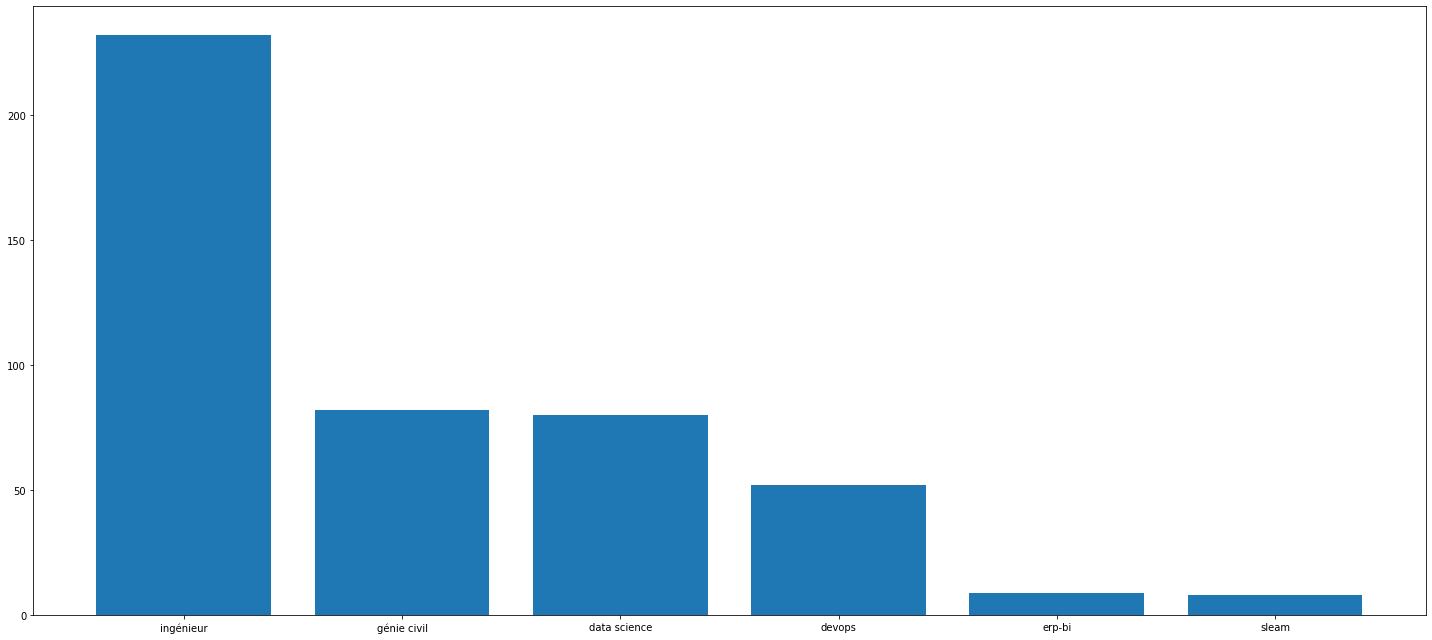

In [80]:
dictc = {}
plt.rcParams["figure.figsize"] = [20, 9]
plt.rcParams["figure.autolayout"] = True

for element , count in final_count.most_common(10):
  dictc[element[0:35]] = count
plt.bar(dictc.keys(), dictc.values())
plt.show()

**Location**

In [81]:
orgs = ['location_name']

final_count = Counter()
for org in orgs:
  final_count = final_count + Counter(df.groupby([org]).size().to_dict())
print(final_count)
location = {'Tunis': 0 , 'France':0}
for key,val in  final_count.items():
  for key_loc,val_loc in location.items():
    if key_loc in key:
      location[key_loc] = val_loc + val
print(location)

Counter({'Tunis, Tunisie': 205, 'Tunis, Tunis, Tunisie': 33, 'Ben Arous, Tunisie': 32, 'Tunisie': 22, 'Menzah, Tunis, Tunisie': 20, 'Bizerte, Tunisie': 15, 'Le Bardo, Tunisie': 12, 'Paris, Ã\x8ele-de-France, France': 12, 'Ben Arous, Ben Arous, Tunisie': 11, 'Soukra, Ariana, Tunisie': 11, 'Ariana, Tunisie': 8, 'Grand Tunis et pÃ©riphÃ©rie': 8, 'Manouba, Tunisie': 8, 'Monastir, Tunisie': 8, 'Nabeul, Tunisie': 8, 'Hammamet, Nabeul, Tunisie': 7, 'Megrine, Ben Arous, Tunisie': 7, 'Ariana, Tunis, Tunisie': 6, 'France': 6, 'Raoued, Ariana, Tunisie': 6, 'Sousse, Tunisie': 6, 'El Ouardia, Tunis, Tunisie': 5, 'Paris et pÃ©riphÃ©rie': 5, 'BÃ©ja, Tunisie': 4, 'El Omrane SupÃ©rieur, Tunis, Tunisie': 4, 'Sfax, Tunisie': 4, 'Bou Mhel El Bassatine, Ben Arous, Tunisie': 3, 'Carthage, Tunisie': 3, 'El Mourouj, Ben Arous, Tunisie': 3, 'Gafsa, Tunisie': 3, 'Kalaa Kebira, Sousse, Tunisie': 3, 'La Nouvelle Medina, Ben Arous, Tunisie': 3, 'Medenine, Tunisie': 3, 'Ariana MÃ©dina, Ariana, Tunisie': 2, 'Bab El 

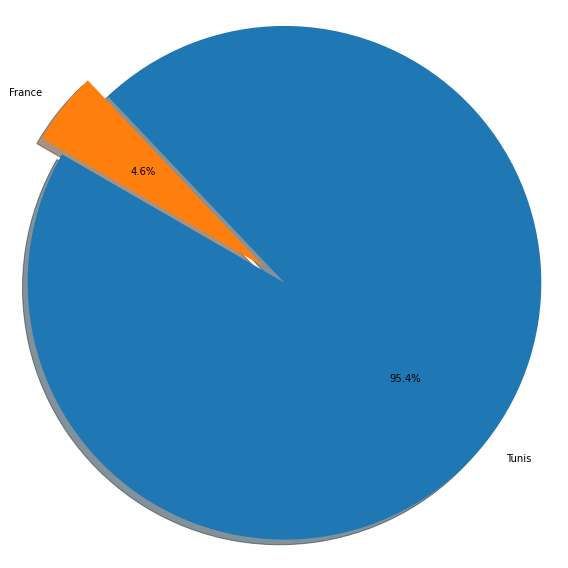

In [82]:
explode=[0,0.1]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(location.values(), explode=explode,labels=location.keys(), autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  
plt.show()

Skills

In [83]:
df['skills']

0      Artificial Intelligence (AI) : 2,Web Solutions...
1      Python (langage de programmation) : 2,Deep lea...
2      R : null,MySQL : null,Java : null,NoSQL : null...
3      JavaScript : 1,HTML : 1,Python : 1,MySQL : 1,J...
4                                                    NaN
                             ...                        
603    MATLAB : null,Python (langage de programmation...
604    AutoCAD : null,Revit : null,Robot structural a...
605    Microsoft Office : null,AutoCAD : null,epanet ...
606    IngÃ©nierie : null,Gestion de projet : null,Co...
607    Microsoft Office : null,Microsoft Word : null,...
Name: skills, Length: 608, dtype: object

In [84]:
df.skills = df.skills.str.replace('[1-9]','', regex = True)
df.skills = df.skills.str.replace('null','', regex = True)
df.skills = df.skills.str.replace(',','', regex = True)
df['skills']

0      Artificial Intelligence (AI) : Web Solutions :...
1      Python (langage de programmation) : Deep learn...
2      R : MySQL : Java : NoSQL : Hadoop : PHP : Symf...
3      JavaScript : HTML : Python : MySQL : Java : No...
4                                                    NaN
                             ...                        
603        MATLAB : Python (langage de programmation) : 
604    AutoCAD : Revit : Robot structural analysis Pr...
605    Microsoft Office : AutoCAD : epanet : swmm : S...
606    IngÃ©nierie : Gestion de projet : Communicatio...
607    Microsoft Office : Microsoft Word : Microsoft ...
Name: skills, Length: 608, dtype: object

**Duplicated Rows**

In [85]:
all_duplicates = df[df.duplicated()]
all_duplicates.value_counts()

Series([], dtype: int64)

**Categorical Missing Values**

**Organization**

**Organization_start Organization_end**

In [86]:
df[['organization_start_1','organization_start_2','organization_start_4','organization_start_5','organization_start_6']].isnull().sum()


organization_start_1     76
organization_start_2    109
organization_start_4    290
organization_start_5    393
organization_start_6    484
dtype: int64

In [87]:
df[['organization_end_1','organization_end_2','organization_end_4','organization_end_5','organization_end_6']].isnull().sum()


organization_end_1    394
organization_end_2    138
organization_end_4    292
organization_end_5    393
organization_end_6    484
dtype: int64

In [88]:
df[['organization_start_1','organization_start_2']] = df[['organization_start_1','organization_start_2']].fillna(df[['organization_start_1','organization_start_2']].max()) 
df[['organization_start_3','organization_start_4']] = df[['organization_start_3','organization_start_4']].fillna(df[['organization_start_3','organization_start_4']].max()) 
df[['organization_start_5','organization_start_6']] = df[['organization_start_5','organization_start_6']].fillna(df[['organization_start_5','organization_start_6']].max()) 

df[['organization_end_1','organization_end_2']] = df[['organization_end_1','organization_end_2']].fillna(value=df[['organization_end_1','organization_end_2']].max())
df[['organization_end_3','organization_end_4']] = df[['organization_end_3','organization_end_4']].fillna(value=df[['organization_end_3','organization_end_4']].max())
df[['organization_end_5','organization_end_6']] = df[['organization_end_5','organization_end_6']].fillna(value=df[['organization_end_5','organization_end_6']].max())



In [89]:
df[['organization_end_1','organization_end_2','organization_end_4','organization_end_5','organization_end_6']].isnull().sum()


organization_end_1    0
organization_end_2    0
organization_end_4    0
organization_end_5    0
organization_end_6    0
dtype: int64

In [90]:
df[['organization_start_1','organization_start_2','organization_start_4','organization_start_5','organization_start_6']].isnull().sum()


organization_start_1    0
organization_start_2    0
organization_start_4    0
organization_start_5    0
organization_start_6    0
dtype: int64

Organization

In [91]:
df[['organization_1','organization_2','organization_3','organization_4','organization_5','organization_6']].isnull().sum()


organization_1     76
organization_2    109
organization_3    191
organization_4    290
organization_5    393
organization_6    484
dtype: int64

In [92]:
imputer=CategoricalImputer()
df['organization_1']=np.array(df['organization_1'],dtype=object)
df['organization_1']=imputer.fit_transform(df['organization_1'])
df['organization_2']=np.array(df['organization_2'],dtype=object)
df['organization_2']=imputer.fit_transform(df['organization_2'])
df['organization_3']=df['organization_3'].fillna("Unknown")
df['organization_4']=imputer.fit_transform(df['organization_4'])
df['organization_4']=np.array(df['organization_4'],dtype=object)
df['organization_5']=imputer.fit_transform(df['organization_5'])
df['organization_5']=np.array(df['organization_5'],dtype=object)
df['organization_6']=imputer.fit_transform(df['organization_6'])
df['organization_6']=np.array(df['organization_6'],dtype=object)



In [93]:
df[['organization_1','organization_2','organization_3','organization_4','organization_5','organization_6']].isnull().sum()


organization_1    0
organization_2    0
organization_3    0
organization_4    0
organization_5    0
organization_6    0
dtype: int64

**Organization title**

In [94]:
imputer=CategoricalImputer()
df['organization_title_1']=np.array(df['organization_title_1'],dtype=object)
df['organization_title_1']=imputer.fit_transform(df['organization_title_1'])

df['organization_title_2']=np.array(df['organization_title_2'],dtype=object)
df['organization_title_2']=imputer.fit_transform(df['organization_title_2'])

df['organization_title_3']=np.array(df['organization_title_3'],dtype=object)
df['organization_title_3']=imputer.fit_transform(df['organization_title_3'])

df['organization_title_4']=np.array(df['organization_title_4'],dtype=object)
df['organization_title_4']=imputer.fit_transform(df['organization_title_4'])

df['organization_title_5']=np.array(df['organization_title_5'],dtype=object)
df['organization_title_5']=imputer.fit_transform(df['organization_title_5'])

df['organization_title_6']=np.array(df['organization_title_6'],dtype=object)
df['organization_title_6']=imputer.fit_transform(df['organization_title_6'])


**organization_description**

In [95]:


df['organization_description_1']=df['organization_description_1'].fillna("Unknown")

df['organization_description_2']=np.array(df['organization_description_2'],dtype=object)
df['organization_description_2']=imputer.fit_transform(df['organization_description_2'])

df['organization_description_3']=df['organization_description_3'].fillna("Unknown")

df['organization_description_4']=df['organization_description_4'].fillna("Unknown")

df['organization_description_5']=df['organization_description_5'].fillna("Unknown")



In [96]:
df[['organization_description_1','organization_description_2','organization_description_3','organization_description_4','organization_description_5']].isnull().sum()


organization_description_1    0
organization_description_2    0
organization_description_3    0
organization_description_4    0
organization_description_5    0
dtype: int64

**organization_url**

In [97]:
imputer=CategoricalImputer()
df['organization_url_1']=np.array(df['organization_url_1'],dtype=object)
df['organization_url_1']=imputer.fit_transform(df['organization_url_1'])

df['organization_url_2']=np.array(df['organization_url_2'],dtype=object)
df['organization_url_2']=imputer.fit_transform(df['organization_url_2'])

df['organization_url_3']=np.array(df['organization_url_3'],dtype=object)
df['organization_url_3']=imputer.fit_transform(df['organization_url_3'])

df['organization_url_4']=np.array(df['organization_url_4'],dtype=object)
df['organization_url_4']=imputer.fit_transform(df['organization_url_4'])

df['organization_url_5']=np.array(df['organization_url_5'],dtype=object)
df['organization_url_5']=imputer.fit_transform(df['organization_url_5'])


**organization_location**

In [98]:
imputer=CategoricalImputer()
df['organization_location_1']=np.array(df['organization_location_1'],dtype=object)
df['organization_location_1']=imputer.fit_transform(df['organization_location_1'])

df['organization_location_2']=np.array(df['organization_location_2'],dtype=object)
df['organization_location_2']=imputer.fit_transform(df['organization_location_2'])

df['organization_location_3']=np.array(df['organization_location_3'],dtype=object)
df['organization_location_3']=imputer.fit_transform(df['organization_location_3'])

df['organization_location_4']=np.array(df['organization_location_4'],dtype=object)
df['organization_location_4']=imputer.fit_transform(df['organization_location_4'])

df['organization_location_5']=np.array(df['organization_location_5'],dtype=object)
df['organization_location_5']=imputer.fit_transform(df['organization_location_5'])

Education

In [99]:
df[['education_degree_1','education_degree_2','education_degree_3','education_1','education_1','education_3']].isnull().sum()


education_degree_1     99
education_degree_2    207
education_degree_3    395
education_1            60
education_1            60
education_3           367
dtype: int64

In [100]:
imputer=CategoricalImputer()
df['education_degree_1']=np.array(df['education_degree_1'],dtype=object)
df['education_degree_1']=imputer.fit_transform(df['education_degree_1'])

df['education_degree_2']=df['education_degree_2'].fillna("Unknown")


df['education_degree_3']=np.array(df['education_degree_3'],dtype=object)
df['education_degree_3']=imputer.fit_transform(df['education_degree_3'])

df['education_1']=np.array(df['education_1'],dtype=object)
df['education_1']=imputer.fit_transform(df['education_1'])

df['education_2']=np.array(df['education_2'],dtype=object)
df['education_2']=imputer.fit_transform(df['education_2'])

df['education_3']=df['education_3'].fillna("Unknown")


In [101]:
df[['education_degree_1','education_degree_2','education_degree_3','education_1','education_1','education_3']].isnull().sum()


education_degree_1    0
education_degree_2    0
education_degree_3    0
education_1           0
education_1           0
education_3           0
dtype: int64

**Location_name**

In [102]:
df['location_name']=np.array(df['location_name'],dtype=object)
df['location_name']=imputer.fit_transform(df['location_name'])

**Address**

In [103]:
df['address']=np.array(df['address'],dtype=object)
df['address']=imputer.fit_transform(df['address'])

**Current_company**

In [104]:
df['current_company']=np.array(df['current_company'],dtype=object)
df['current_company']=imputer.fit_transform(df['current_company'])

**Current_company_position**

In [105]:
df['current_company_position']=np.array(df['current_company_position'],dtype=object)
df['current_company_position']=imputer.fit_transform(df['current_company_position'])

**Skills**

In [106]:
df['skills']=df['skills'].fillna("Unknown")
# df['skills']=np.array(df['skills'],dtype=object)
# df['skills']=imputer.fit_transform(df['skills'])

In [107]:
df.head()

,member_id,profile_url,full_name,headline,location_name,address,current_company,current_company_position,organization_1,organization_url_1,...,organization_start_6,organization_end_6,education_1,education_degree_1,education_2,education_degree_2,education_3,education_degree_3,skills,education_1
0,550489359,https://www.linkedin.com/in/baycii/,Baycii Wassim Derbel,Computer Engineer & Data Scientist | Specializ...,"Ville de Paris, Ãle-de-France, France","Ville de Paris, Ãle-de-France, France",Kaisens Data,Data Science,Kaisens Data,https://www.linkedin.com/company/18450880/,...,2020.07,2021.06,UniversitÃ© Gustave Eiffel,"Master of Research, Intelligent Systems and Ap...",Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"National diploma of Engineer certified by CTI,...",LycÃ©e Ennasr,"High School Diploma, Mathematics",Artificial Intelligence (AI) : Web Solutions :...,Ecole ingenieur France
1,698923074,https://www.linkedin.com/in/ichrak-houidi-4560...,Ichrak Houidi,Data scientist intern at Keyrus,"Sousse, Tunisie","Sousse, Tunisie",Keyrus,Data Science,Keyrus,https://www.linkedin.com/company/12328/,...,2020.07,2021.06,Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"DiplÃ´me d'ingÃ©nieur, Data science",isitcom,Unknown,Unknown,"BaccalaurÃ©at, MathÃ©matiques",Python (langage de programmation) : Deep learn...,ESPRIT
2,595214386,https://www.linkedin.com/in/oussama-sassi-92a4...,Oussama Sassi,Data Scientist chez RUTILEA,"Ariana, Tunisie","Ariana, Tunisie","Rutilea, Inc.",Data Science,"Rutilea, Inc.",https://www.linkedin.com/company/76253416/,...,2020.07,2021.06,Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"DiplÃ´me d'ingÃ©nieur, Data Science",Ecole Nationale d'IngÃ©nieurs de Tunis,Unknown,Unknown,"BaccalaurÃ©at, MathÃ©matiques",R : MySQL : Java : NoSQL : Hadoop : PHP : Symf...,ESPRIT
3,766616182,https://www.linkedin.com/in/skander-haddad-75a...,Skander Haddad,Data Scientist | Deeplearning.ai ambassador | ...,"Monastir, Tunisie","Monastir, Tunisie",Enactus Esprit ICT,Data Science,Enactus Esprit ICT,https://www.linkedin.com/company/18957220/,...,2020.07,2021.06,Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"Master's degree, Computer Science",Manara High-School,"High School Diploma, Mathematics",Unknown,"BaccalaurÃ©at, MathÃ©matiques",JavaScript : HTML : Python : MySQL : Java : No...,ESPRIT
4,621761804,https://www.linkedin.com/in/kais-ben-youssef-a...,Kais Youssef,Data Scientist chez ENGIE,"Paris, Ãle-de-France, France","Paris, Ãle-de-France, France",ENGIE,Data Science,ENGIE,https://www.linkedin.com/company/298246/,...,2020.07,2021.06,UniversitÃ© Paris Dauphine- PSL,"Master 1, MathÃ©matiques appliquÃ©es",Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"CPGE MathÃ©matiques Physiques, MathÃ©matiques",LycÃ©e les pÃ¨res blancs,"BaccalaurÃ©at, MathÃ©matiques",Unknown,Ecole ingenieur France


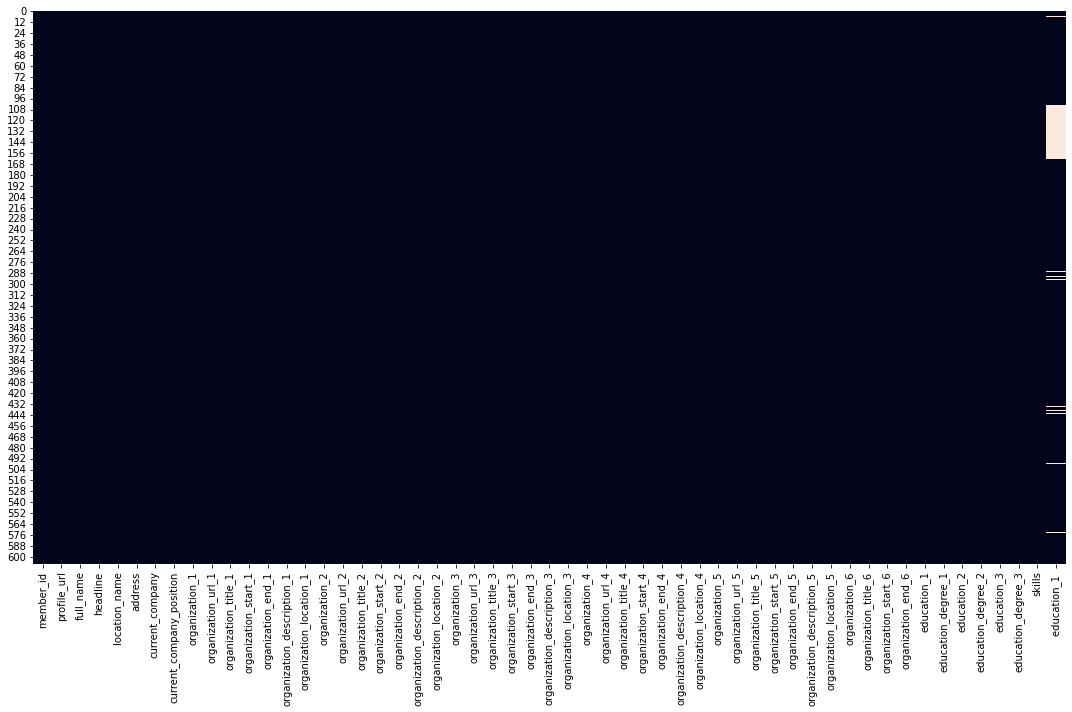

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False)

In [109]:
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 12.5 MB/s 


In [110]:
df.to_excel("../data.xlsx", engine='xlsxwriter',index = False)
df.to_csv("../data.csv",header=True,index=False)

### Preparing data for content based recommandation system model

I wanted my data to be ready for a content based recommendation model and content based recommendation models need information about items or users to find similarity. So my first approach consisted of using the headline section to find similar internship listings. For this, I would have to convert the 'headline' section for each internship profile, using bag of words from NLP, into vectors. I would then get a matrix where the rows would consist of internship profiles and the columns would be different words. The values in this matrix would be the number of times each word appears in details section of each internship profile. This would be called a user-item matrix. This way, if we multiplied this matrix with its transpose, we would get to know how similar two internship profiles are

We have decided to use the following features for creating filters in the app:

-skills

-headline


Tokenize : Tokenizing here means splitting a sentence into words. Running the above step ensures that tokenizing won’t return ‘.’ or number as words. Thus, we will have only English words as tokens.
strip() method on the tokens will remove any extra trailing or leading space. This way wherever, for example, ‘internship’ appears in the text it won’t appear as ‘internship ’ or ‘ internship’ 

In [111]:
def tokenize(sentences):
    '''
    tokenizes a bunch of sentences after normalizing them and returns stemmed tokens.
    
    INPUT:
    sentences - a paragraph that need to be tokenized
    
    OUTPUT:
    tokens - list of stemmed tokens
    
    '''
    # normalizing, tokenizing, lemmatizing 
    sentences = re.sub('\W',' ',sentences) 
    sentences = re.sub('[0-9]',' ',sentences)

    tokens = word_tokenize(sentences)
    tokens = [i.strip() for i in tokens]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(i) for i in tokens]
    return tokens

### Tfidf

In [112]:
def similarity_matrix(df):
    '''
    returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    headline section of df.
    
    INPUT:
    df - dataframe with 'd' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with perosn fullname  
    
    '''
    headline = df['headline']
    vect = CountVectorizer(tokenizer= tokenize, stop_words = 'english')
    tfidf = TfidfTransformer()
    
    mat = tfidf.fit_transform(vect.fit_transform(headline).toarray()).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.member_id, index = df.member_id)
    return sim

In [113]:
sim = similarity_matrix(df)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

In [114]:
sim.to_csv('../recommendation_matrix.csv', index = True)

## CountVectorizer

In [115]:
def similarity_matrix_wo_tfidf(df):
    '''
    returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    headline section
    
    INPUT:
    df - dataframe with 'headline' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with person fullname 
    
    '''
    headline = df['headline']
    vect = CountVectorizer(tokenizer= tokenize, stop_words = 'english')
    
    mat = vect.fit_transform(headline).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.member_id,index=df.member_id)
    return sim

In [116]:
sim_1 = similarity_matrix_wo_tfidf(df)
sim_1.to_csv('../recommendation_matrix_wo_tfidf.csv', index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

## lemmatizing word
lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item

In [117]:
def tokenize_lem(sentences):
    '''
    tokenizes a bunch of sentences after normalizing it and returns lemmatized tokens.
    
    INPUT:
    sentences - a paragraph that needs to be tokenized
    
    OUTPUT:
    tokens - list of lemmatized tokens
    
    '''
    # normalizing, tokenizing, lemmatizing 
    sentences = re.sub('\W',' ',sentences) 
    sentences = re.sub('[0-9]',' ',sentences)

    tokens = word_tokenize(sentences)
    tokens = [i.strip() for i in tokens]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(i) for i in tokens]
    return tokens

In [118]:
def similarity_matrix_w_lem(df):
    '''
   returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    headline section
    
    INPUT:
    df - dataframe with 'headline' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with person fullname 
    '''
    headline= df['headline']
    vect = CountVectorizer(tokenizer= tokenize_lem, stop_words = 'english')
    tfidf = TfidfTransformer()
    
    mat = tfidf.fit_transform(vect.fit_transform(headline).toarray()).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.member_id,index=df.member_id)
    return sim

In [119]:
sim_2 = similarity_matrix_w_lem(df)
sim_2.to_csv('../recommendation_matrix_w_lem.csv', index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


## Use lemmatization without tfidf

In [120]:
def similarity_matrix_w_lem_wo_tfidf(df):
    '''
   returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    headline section
    
    INPUT:
    df - dataframe with 'headline' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with person fullname 
    '''
    headline = df['headline']
    vect = CountVectorizer(tokenizer= tokenize_lem, stop_words = 'english')
    tfidf = TfidfTransformer()
    
    mat = vect.fit_transform(headline).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.member_id,index=df.member_id)
    return sim

In [121]:
sim_3 = similarity_matrix_w_lem_wo_tfidf(df)
sim_3.to_csv('../recommendation_matrix_w_lem_wo_tfidf.csv', index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


After forming these 3 with the headline section, we try an alternate approach and try to use the 'skills' column to form the similarity matrix. Thus, in the make_recs notebook, we will try using this too and compare it with the results of the above 3.

In [122]:
def similarity_matrix_skills(df):
    '''
    returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    skills section
    
    INPUT:
    df - dataframe with 'skills' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with full_name 
    '''
    skills = df['skills']
    vect = CountVectorizer(tokenizer= tokenize, stop_words = 'english')
    tfidf = TfidfTransformer()
    
    mat = vect.fit_transform(skills).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.member_id,index=df.member_id)
    return sim

In [123]:
sim_skills=similarity_matrix_skills(df)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

In [124]:
sim_skills.to_csv('../recommendation_df_skills.csv', index = True)